# **Decision Tree -- CART**


In this application, we will use the CART method to analyse a dataset. We will explore the *Ionospere* dataset, available in the *mlbench* R package.

## About CART

The CART method, Breiman et al (1984), is a supervised and non-parametric method for constructing decision trees. We have two scenarios:

CART enables:
*   Regression tree (the variable to be predicted is continuous)
*   Classification tree (the variable to be predicted is factorial with k modalities)

In both cases, the tree constructed is binary.

## Setting your R environment

In [18]:
if (!require(mlbench)) install.packages('mlbench')
if (!require(mlbench)) install.packages('rpart')

In [2]:
library(mlbench)
library(rpart)

In [3]:
# Load the Ionosphere data in the R environment
data("Ionosphere")

# This radar data was collected by a system in Goose Bay, Labrador. The dataset is composed of 351 observations
# on 35 variables (some numerical, 2 nominal and one for the class). The targets were free electrons in the ionosphere.
# "good" radar returns are those showing evidence of some type of structure in the ionosphere. "bad" returns are
# those that do not; their signals pass through the ionosphere.

In [35]:
# View the data
head(Ionosphere)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V27,V28,V29,V30,V31,V32,V33,V34,Class,train
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,⋯,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good,0
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,⋯,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad,0
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,⋯,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good,1
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,⋯,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad,0
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,⋯,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good,1
6,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,⋯,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,bad,1



FALSE 
12636 

# Partitionning the dataset into training and test:

The training dataset will be used to build the model (decision tree). The test dataset will be used to test the model. In practice, we randomly pick 80% of the dataset for training, and keep the rest for testing.

In [19]:
# Set a seed
set.seed(42)

In [20]:
# Add a column to the dataset and insert 1 for training, else 0
Ionosphere[, "train"] <- ifelse(runif(nrow(Ionosphere))<0.8,1,0)

In [21]:
# Split the Ionosphere data
trainset <- Ionosphere[Ionosphere$train == 1,]
testset <- Ionosphere[Ionosphere$train == 0,]

In [22]:
# The column 'train' is now useless; we remove it
trainColNum <- grep("train", names(trainset))
trainset <- trainset[,-trainColNum]
testset <- testset[,-trainColNum]

# Obtaining a decision tree from the training set:

To obtain a decision tree with the CART approach, we will use the rpart function of the rpart R package. We will indicate that we want to predict a discrete variable with the option 'method="class"' (not to be confused with "Class"...). By default, the implemented rpart method uses the Gini index. We keep this default option.

In [28]:
# Build the model
my_parms = list(split = 'gini') # another option is 'information' for the Entropie
rpart_model <- rpart(Class~., data = trainset, method = "class", parms = my_parms)
rpart_model

n= 280 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 280 100 good (0.35714286 0.64285714)  
   2) V5< 0.23154 61   2 bad (0.96721311 0.03278689) *
   3) V5>=0.23154 219  41 good (0.18721461 0.81278539)  
     6) V27>=0.999945 42  11 bad (0.73809524 0.26190476)  
      12) V1=0 17   0 bad (1.00000000 0.00000000) *
      13) V1=1 25  11 bad (0.56000000 0.44000000)  
        26) V18< -0.72596 7   0 bad (1.00000000 0.00000000) *
        27) V18>=-0.72596 18   7 good (0.38888889 0.61111111) *
     7) V27< 0.999945 177  10 good (0.05649718 0.94350282) *

For each line, we get (in this order):

*   the number of the node *t* (eg. '3)')
*   the name of the node *t* (eg. 'V5>=0.23154')
*   the number of elements at node *t* (eg. '219')
*   the number of elements for the minority class at *t*, ie. the loss (eg. '41')
*   the minority class at node *t* (eg. 'good')
*   the proportions of the classes at node *t* (eg. '(0.18721461 0.81278539)')

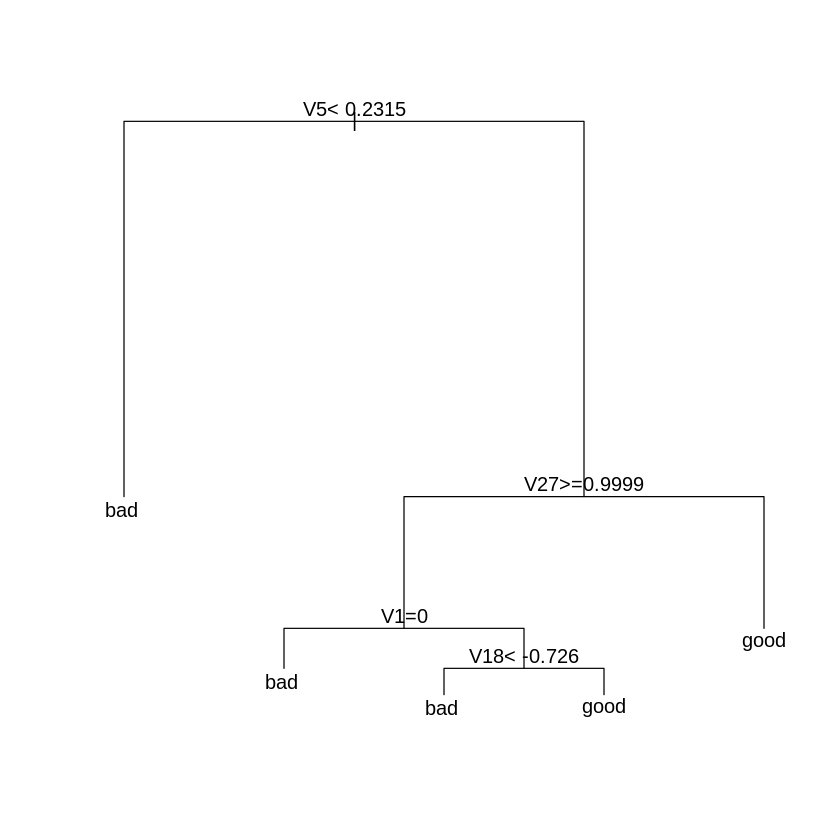

In [10]:
# Plot the tree
plot(rpart_model)
text(rpart_model,pretty=1)

# We get 3 nodes and 5 leaves

In [ ]:
# Ler us get a detailed summary
summary(rpart_model)

This detailed summary provides us:

*   rpart_model\$**cptable** : information matrix for the choice of the optimal *cp* (complexity) required for the pruning.
*   rpart_model\$**variable.importance** : the importance (hierarchyà of variables.
*   rpart_model\$**splits** : information matrix of nodes *t*.



## Testing the quality of the model

In [30]:
# When testing, we need to remove the target variable "Class" from the dataset.

# Get the column number corresponding to "Class"
typeColNum <- grep("Class", names(Ionosphere))

# Make predictions with built model on the test set
rpart_predict <- predict(rpart_model, testset[, -typeColNum], type = "class")

In [31]:
# Compute the proportion of correct prediction
round( mean(rpart_predict == testset$Class), digits = 4)

[1] 0.8451

In [32]:
# Produce a confusion matrix from the results
table(pred = rpart_predict, true = testset$Class)

# NB:
# The above test should be perfom several times, each time using a different training-test pair set.

      true
pred   bad good
  bad   17    2
  good   9   43

## Pruning the tree

We will prune the tree using the cost complexity criterion. The idea is to find out wether there exist a shallower subtree that can give comparable results. If yes, we should pefer this tree as it reduces the likelihood of overfitting. For this, we find the *cp* that provides the lowest prediction error (everything has already been computed with rpart).</br>

By default, *rpart* provides a *non maximal tree*. Indeed, the tree is *penalized* a complexity parameter *cp* given in the *rpart.control()* otpions of the model. The default options are:

```
rpart.control(minsplit = 20, minbucket = round(minsplit/3),cp = 0.01,...)
```





Classification tree:
rpart(formula = Class ~ ., data = trainset, method = "class")

Variables actually used in tree construction:
[1] V1  V18 V27 V5 

Root node error: 100/280 = 0.35714

n= 280 

    CP nsplit rel error xerror     xstd
1 0.57      0      1.00   1.00 0.080178
2 0.20      1      0.43   0.45 0.061456
3 0.02      2      0.23   0.26 0.048565
4 0.01      4      0.19   0.30 0.051755


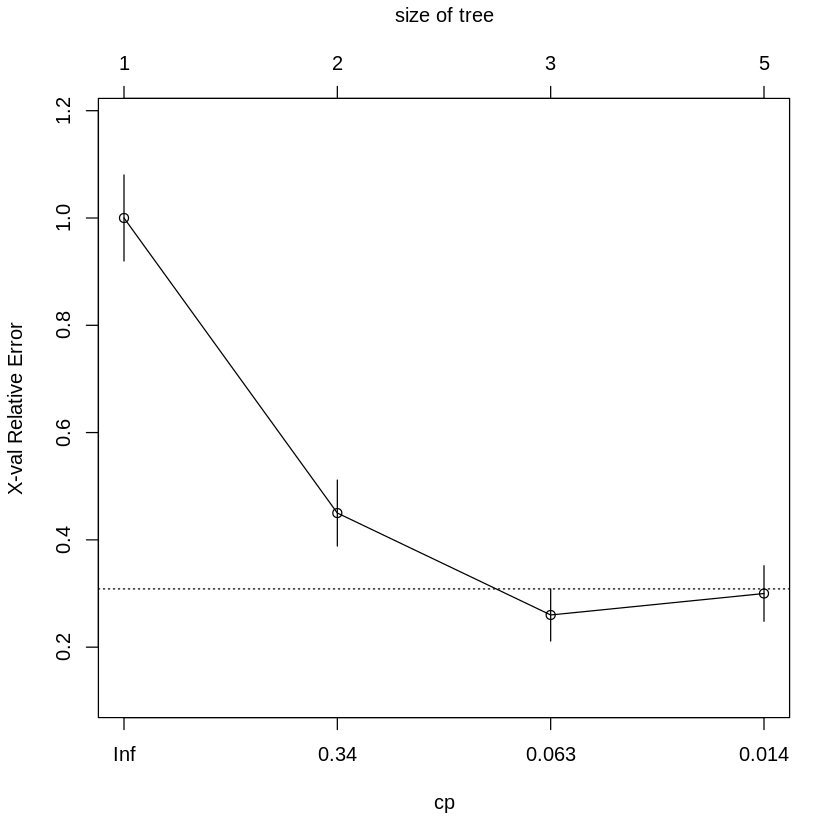

In [14]:
# Cost-complexity pruning
printcp(rpart_model)
plotcp(rpart_model)

The CP table is a matrix that helps to choose the optimal *cp* for the pruning. The objective is to keep the *cp* that minimizes the prediction error. T make this *cp* choice robust, we consider the error rate given by the column *xerror* obtained by cross-validation (and its stdev). </br>

At each algorithm step, *rpart* generates a tree that is more complex until a given *cp* limit.

In [15]:
# Get the index of this lowest xerror
opt <- which.min(rpart_model$cptable[,"xerror"])
cp <- rpart_model$cptable[opt, "CP"]
cp

[1] 0.02

About *rel_error*:</br>
This the tree error for each *cp* value, ie. the error rate of the missclassified observations divided by the loss value of the root node.


```
rel error = error rate (confusion matrix obtained with predict()) / expected loss of the root node.
```

Computing steps:

1.   Construct a tree penalized with the *cp* of each line of the CP table
2.   Make the predictions on the train data to get the confusion matrix
3.   Compute the error rate from the confusion matrix
4.   Deduce the *rel_error* by dividing the error rate by the loss at the root of the tree



## Computing cp

For each node t

- Take the loss of the root node.
- Take the loss of the node t.
- Take the loss of the children tg and td.
- Subtract the losses, t−tg−td and divide by the root node loss.

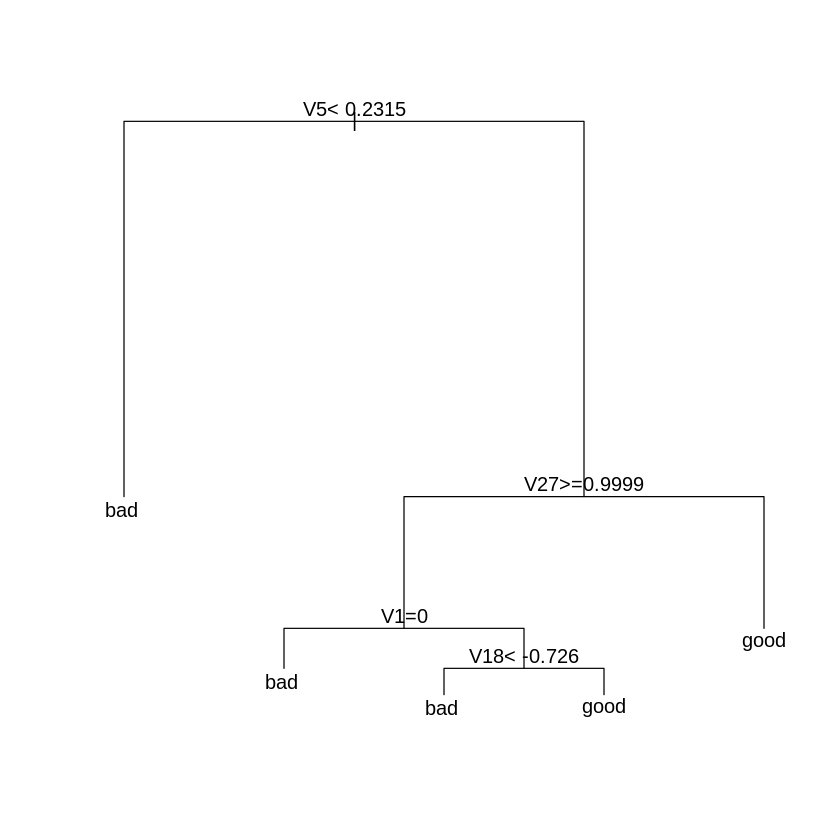

In [36]:
# Plot the tree
plot(rpart_model)
text(rpart_model,pretty=1)

In [37]:
rpart_model

n= 280 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 280 100 good (0.35714286 0.64285714)  
   2) V5< 0.23154 61   2 bad (0.96721311 0.03278689) *
   3) V5>=0.23154 219  41 good (0.18721461 0.81278539)  
     6) V27>=0.999945 42  11 bad (0.73809524 0.26190476)  
      12) V1=0 17   0 bad (1.00000000 0.00000000) *
      13) V1=1 25  11 bad (0.56000000 0.44000000)  
        26) V18< -0.72596 7   0 bad (1.00000000 0.00000000) *
        27) V18>=-0.72596 18   7 good (0.38888889 0.61111111) *
     7) V27< 0.999945 177  10 good (0.05649718 0.94350282) *

In [38]:
as.data.frame(rpart_model$cptable[1:2,1])

# First cp
# (100-2-41)/100 = 0.57

# Second cp
# (41-11-10)/100 = 0.2

,"rpart_model$cptable[1:2, 1]"
,<dbl>
1,0.57
2,0.20


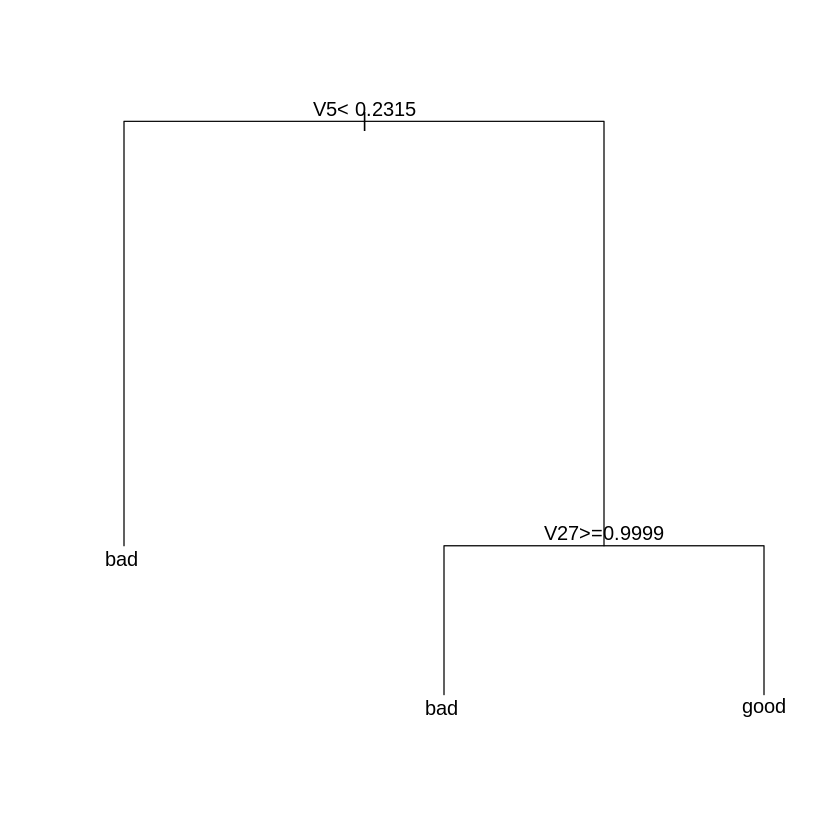

In [39]:
# Finally, we prune the tree
pruned_model <- prune(rpart_model, cp)
plot(pruned_model); text(pruned_model)

## Compare the pruned tree with the fully grown tree

In [40]:
# Compute the proportion of correct prediction with the pruned_model
rpart_pruned_predict <- predict(pruned_model, testset[, -typeColNum], type = "class")
round( mean(rpart_pruned_predict == testset$Class), digits = 4)

# NB:
# There is an improvement! But, we should check if this improvement holds for several training-test pair sets.

[1] 0.8873

## Performing multiple runs

We will create random partitions of the dataset and check the efficacy of the pruning for each. Let's create a function for this, that takes as arguments the training fraction, the number of runs and the dataset as input. This function will output the proportion of correct predictions for each run. It will also prunes the tree.

In [41]:
multiple_runs_classification <- function(train_fraction, n, dataset, prune_tree = FALSE){

  # Set the return value (proportion of correct predictions)
  fraction_correct <- rep(NA, n)

  set.seed(42)

  # Loop over the number of runs
  for(i in 1:n){
    # Set a 'train' flag
    dataset[, "train"] <- ifelse(runif(nrow(dataset))<0.8,1,0)

    # Identify the 'train' and 'Class' column index
    trainColNum <- grep("train", names(dataset))
    typeColNum <- grep("Class", names(dataset))

    # Make the training and test sets
    trainset <- dataset[dataset$train == 1, -trainColNum]
    testset <- dataset[dataset$train == 0, -trainColNum]

    # Build the model
    rpart_model <- rpart(Class~., data = trainset, method = "class")

    # If pruning is not required, compute only the proportion of correct predictions
    if(prune_tree == FALSE){

      rpart_test_predict <- predict(rpart_model, testset[, -typeColNum], type = "class")
      fraction_correct[i] <- mean(rpart_test_predict == testset$Class)

    } else{
    # else, postprune the tree and compute the proportion of correct predictions

      opt <- which.min(rpart_model$cptable[,"xerror"])
      cp <- rpart_model$cptable[opt, "CP"]

      pruned_model <- prune(rpart_model, cp)
      rpart_pruned_predict <- predict(pruned_model, testset[, -typeColNum], type = "class")
      fraction_correct[i] <- mean(rpart_pruned_predict == testset$Class)
    }
  }

  return(fraction_correct)
}

In [42]:
# Make 50 runs, without pruning
unpruned_set <- multiple_runs_classification(0.8, 50, Ionosphere)
round( mean(unpruned_set), digits = 4)
round( sd(unpruned_set), digits = 4)

[1] 0.8714

[1] 0.0332

In [43]:
# Make 50 runs, with pruning
pruned_set <- multiple_runs_classification(0.8, 50, Ionosphere, prune_tree = TRUE)
round( mean(pruned_set), digits = 4)
round( sd(pruned_set), digits = 4)

# NB:
# There is an improvement when pruning. If you print the trees, you can see that this improvement is obtained
# with shallower trees.

[1] 0.8895

[1] 0.0305